In [2]:
library("ggplot2")

players_data <- read.csv("players_22.csv")
head(players_data, 5)

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,⋯,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<int>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,158023,https://sofifa.com/player/158023/lionel-messi/220002,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000,320000,34,⋯,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
2,188545,https://sofifa.com/player/188545/robert-lewandowski/220002,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000,270000,32,⋯,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
3,20801,https://sofifa.com/player/20801/c-ronaldo-dos-santos-aveiro/220002,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000,270000,36,⋯,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
4,190871,https://sofifa.com/player/190871/neymar-da-silva-santos-jr/220002,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000,270000,29,⋯,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,,https://cdn.sofifa.net/flags/br.png
5,192985,https://sofifa.com/player/192985/kevin-de-bruyne/220002,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000,350000,30,⋯,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


A analise será feita com a coluna de idade dos jogadores

In [3]:

y_players <- players_data[, 10]
x_players <- seq(from = 0, to = length(y_players) - 1, by = 1)

data <- data.frame(x= x_players, y= y_players)
head(data, 5)

,x,y
,<dbl>,<int>
1,0,34
2,1,32
3,2,36
4,3,29
5,4,30


Calculando media, mediana, variância, desvio padrão e coeficiente de variância populacional

In [10]:
m_age <- mean(y_players, na.rm = TRUE)
medi_age <- median(y_players, na.rm = TRUE)
vari_age <- sd(y_players, na.rm = TRUE)^2
standard_dev_age <- sd(y_players, na.rm = TRUE)
coef_var_age <- vari_age/m_age

cat("media das idades: ", m_age, "\n")
cat("mediana das idades: ", medi_age, "\n")
cat("variância populacional das idades: ", vari_age, "\n")
cat("desvio padrão populacional das idades: ", standard_dev_age, "\n")
cat("Coeficiente de variância populacional das idades: ", coef_var_age, "\n")

media das idades:  25.21082 
mediana das idades:  25 
variância populacional das idades:  22.54574 
desvio padrão populacional das idades:  4.748235 
Coeficiente de variância populacional das idades:  0.8942881 


Temos que a media é quase identica à mediana, e que, em geral, os dados não variam muito da media. Podemos deduzir que esta base de dados tem uma distribuição de probabilidade normal.
Iremos confirmar isso mais tarde

Calculando a variância, desvio padrão e coeficiente de variância amostral para n = 1000

In [14]:
sample_age <- y_players[c(seq(from = 1, to = 1001, by = 1))]

sample_vari <- sd(sample_age, na.rm = TRUE)^2
sample_standard_dev <- sd(sample_age, na.rm = TRUE)
sample_coef_var <- sample_standard_dev/mean(sample_age)
cat("media amostral: ", mean(sample_age), "\n")
cat("variancia amostral: ", sample_vari, "\n")
cat("desvio padrão amostral: ", sample_standard_dev, "\n")
cat("coeficiente de variação amostral: ", sample_coef_var, "\n")

media amostral:  28.2038 
variancia amostral:  16.00243 
desvio padrão amostral:  4.000303 
coeficiente de variação amostral:  0.1418356 


Calculando os quartis e plotando o histograma, box plot e distribuição de probabilidades

In [15]:
quantiles_age <- quantile(y_players)
cat("Quartis das idades: ", quantiles_age, "\n")

Quartis das idades:  16 21 25 29 54 


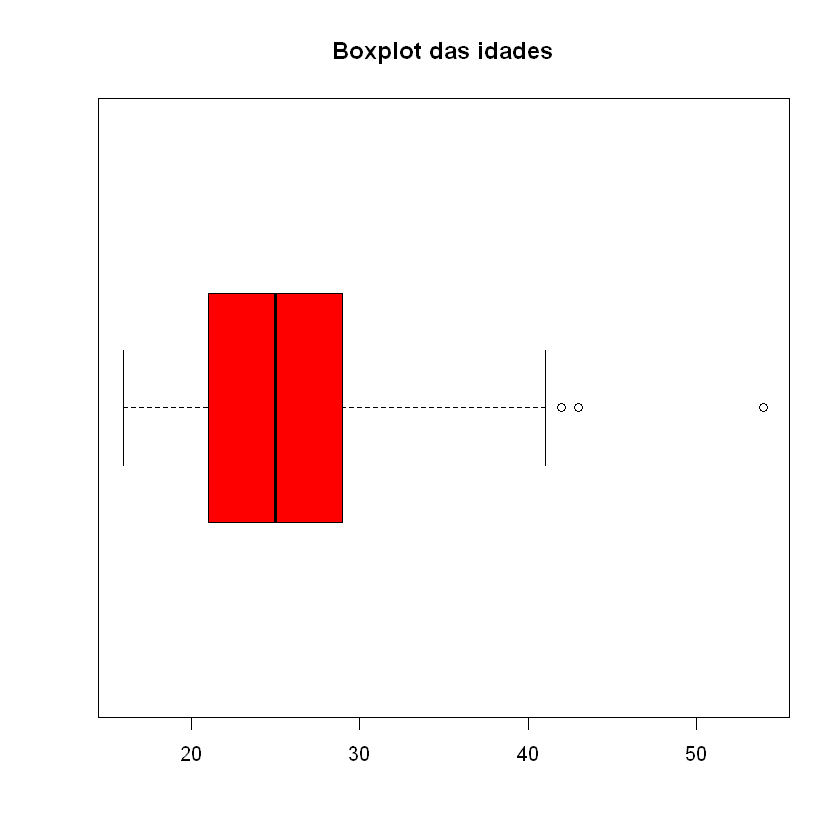

In [18]:
boxplot(x = y_players, main = "Boxplot das idades", horizontal = TRUE, col = "red")

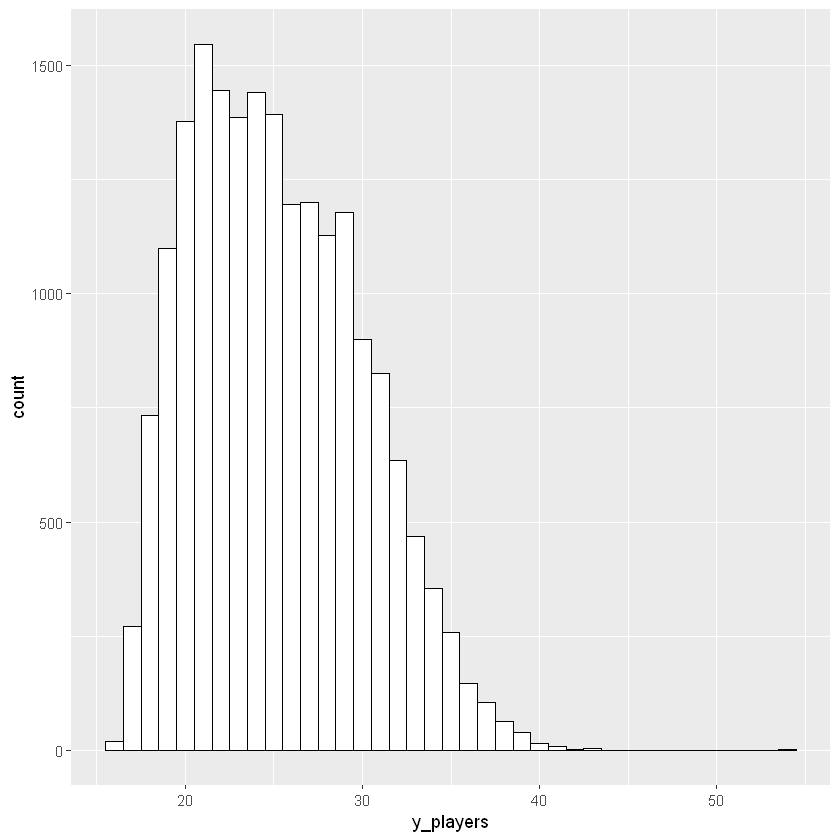

In [34]:
p <- ggplot(data, aes(x = y_players)) + geom_histogram(color="black", fill = "white", binwidth = 1)
p

Existe um outlier muito grande no y_players = 54, plotando o histograma removendo ele temporiaramente

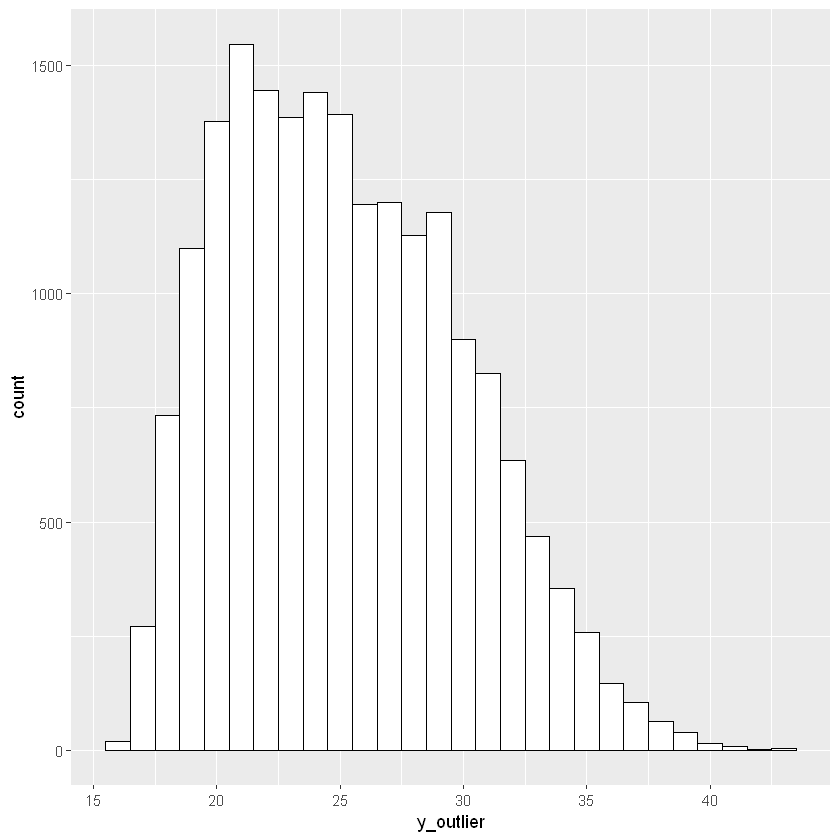

In [44]:
y_outlier <- y_players[! y_players %in% 54]
x_outlier <- seq(from = 1, to = length(y_outlier), by = 1)

data_rm_outlier <- data.frame(x = x_outlier, y = y_outlier)

p_outlier <- ggplot(data_rm_outlier, aes(x = y_outlier)) + geom_histogram(color="black", fill = "white", binwidth = 1)
p_outlier

Como podemos ver, a base de dados se comporta muito mais como uma normal sem o outlier de y_players = 54. Portanto, tendo em vista que só existe ele como um outlier tão grande, iremos remover ele para analises futuras

Plotando o histogramas de densidade junto com a PDF

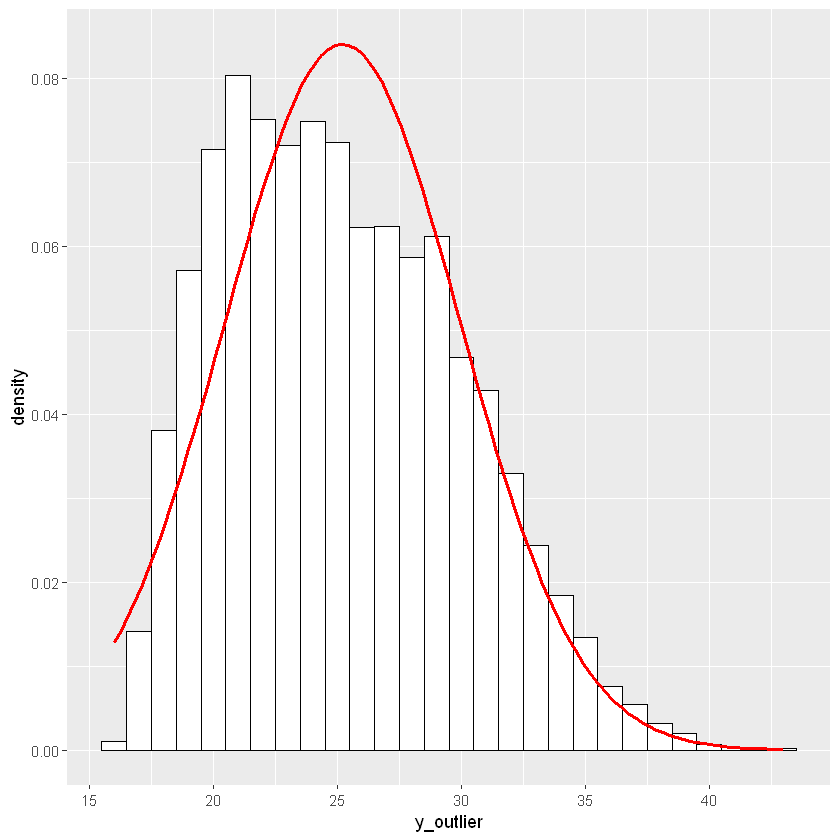

In [61]:
m_age_outlier <- mean(y_outlier)
sd_outlier <- sd(y_outlier)

p_outlier <- ggplot(data_rm_outlier, aes(x = y_outlier)) + geom_histogram(aes(y = after_stat(density)), color = "black", fill = "white", binwidth = 1) +
stat_function(fun = function(x) {dnorm(x, mean = m_age_outlier, sd = sd_outlier)}, color="red", linewidth = 1)
p_outlier


Plotando o histograma de densidade mais a PDF incluindo o outlier de 54

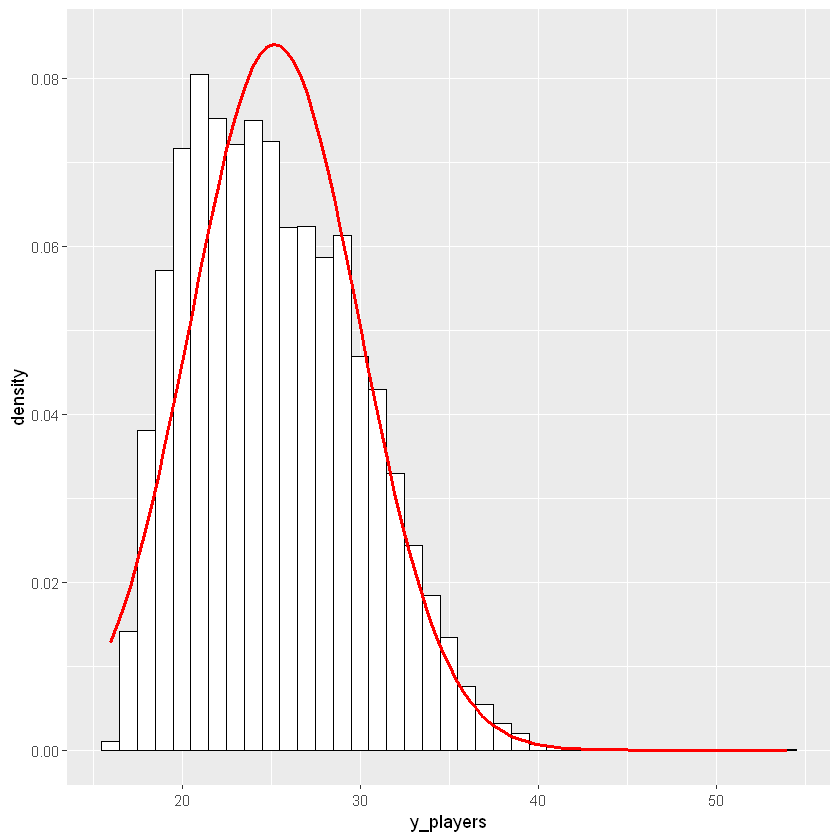

In [63]:
p_density <- ggplot(data, aes(x = y_players)) + geom_histogram(aes(y=after_stat(density)), color = "black", fill = "white", binwidth = 1) +
stat_function(fun = function(x) {dnorm(x, mean = m_age, sd = standard_dev_age)}, color="red", linewidth = 1)
p_density

Como podemos ver, o outlier de 54 não tem muito impacto, portanto iremos remove-lo